In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
df=pd.read_csv('placement_2.csv')

In [3]:
df.shape

(1000, 3)

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
404,8.02,35.0,1
546,6.75,18.0,1
506,7.84,8.0,1
14,7.91,43.0,0
634,7.69,39.0,0


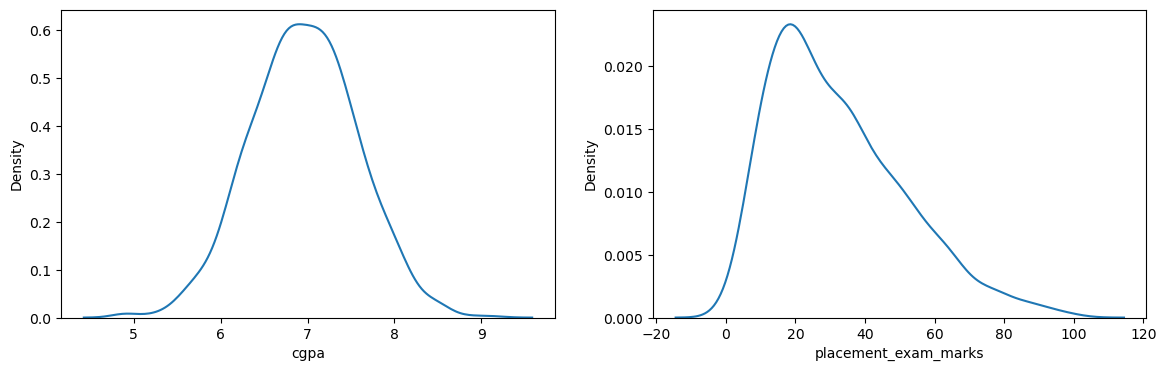

In [5]:
plt.figure(figsize=(14,4))
plt.subplot(121)

sns.kdeplot(df['cgpa'])
plt.subplot(122)
sns.kdeplot(df['placement_exam_marks'])
plt.show()

In [6]:
# near to 0, means not skew i.e normally distributed
df['cgpa'].skew(),df['placement_exam_marks'].skew()
# placement_exam_marks is right skewed

(-0.014529938929314918, 0.8356419499466834)

In [7]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

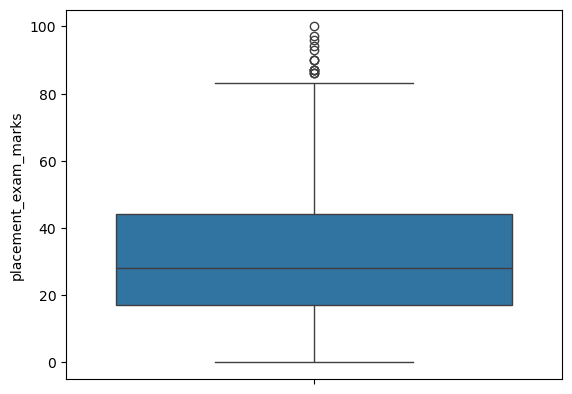

In [8]:
sns.boxplot(df['placement_exam_marks'])

In [9]:
# finding IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [10]:
percentile25,percentile75

(17.0, 44.0)

In [11]:
iqr = percentile75-percentile25
iqr

27.0

In [12]:
upper_limit = percentile75+1.5*iqr
lower_limit = percentile25-1.5*iqr

In [13]:
upper_limit,lower_limit

(84.5, -23.5)

### Finding Outliers

In [14]:
df[(df['placement_exam_marks']<lower_limit) | (df['placement_exam_marks']>upper_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


### Trimming

In [15]:
newdf= df[(df['placement_exam_marks']<upper_limit)]

In [16]:
newdf.shape

(985, 3)

In [17]:
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


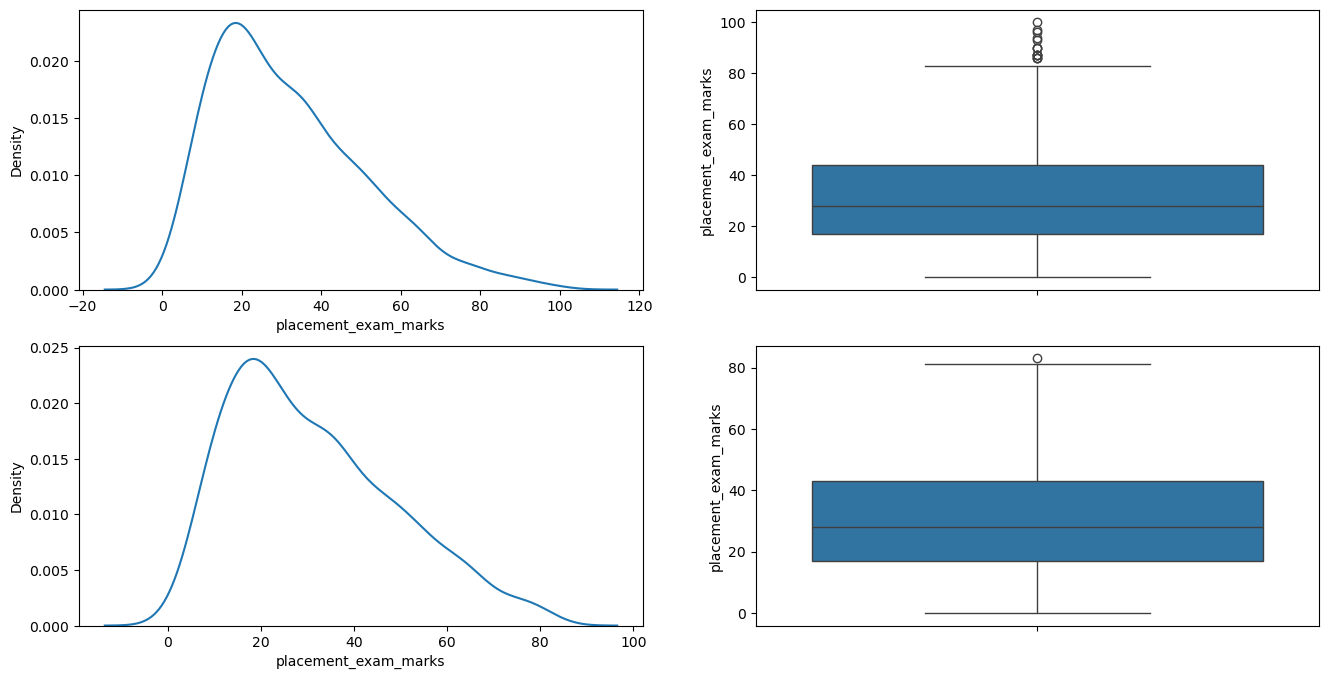

In [18]:
plt.figure(figsize=(16,8))
plt.subplot(221)

sns.kdeplot(df['placement_exam_marks'])
plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])
plt.subplot(223)

sns.kdeplot(newdf['placement_exam_marks'])
plt.subplot(224)
sns.boxplot(newdf['placement_exam_marks'])
plt.show()

In [20]:
new_df_cap = df.copy()

In [21]:
new_df_cap['placement_exam_marks']=np.where(
    new_df_cap['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks']<lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [23]:
new_df_cap.shape

(1000, 3)

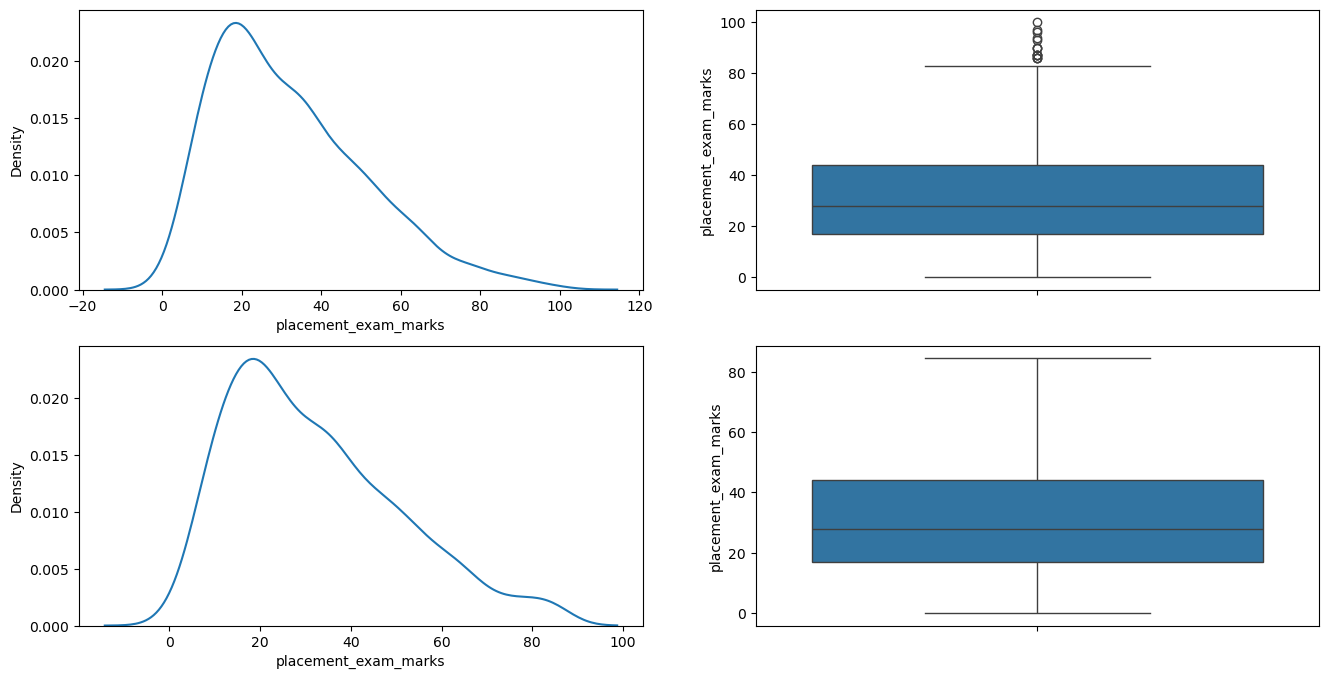

In [24]:
plt.figure(figsize=(16,8))
plt.subplot(221)

sns.kdeplot(df['placement_exam_marks'])
plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])
plt.subplot(223)

sns.kdeplot(new_df_cap['placement_exam_marks'])
plt.subplot(224)
sns.boxplot(new_df_cap['placement_exam_marks'])
plt.show()